In [1]:
#Importar un archivo CSV con Pandas 
# #Se importa la librería pandas 
# # La documentación de la librería se puede ver acá: https://pandas.pydata.org/docs/ 
import pandas as pd 
#Otras librerías necesarias 
import numpy as np 
import os 
#Cambiar el directorio actual con chdir 
os.chdir('c:/Users/ego_2/Documents/Ebac/Clases/Python/Python avanzado')
# Se usa la función read_csv para leer el archivo.csv 
# #Se ingresa el nombre del archivo entre comillas 
# #y lo ingesta en la variable en df 
df = pd.read_csv('fifa_eda.csv')

In [2]:
df.sample(5)

ID            Name  Age Nationality  Overall  Potential  \
17651  242590     S. Fukahori   20       Japan       53         63   
7870   198451  Dani Rodríguez   30       Spain       67         67   
16194  232403         T. Maya   21    Colombia       58         68   
13358  222294      Sun Shilin   29    China PR       62         62   
17174  242585      T. Shibuya   23       Japan       55         60   

                                Club  Value  Wage Preferred Foot  \
17651                 Nagoya Grampus  100.0   1.0          Right   
7870                    RCD Mallorca  700.0   4.0          Right   
16194                 Atlético Huila  180.0   1.0           Left   
13358  Shanghai Greenland Shenhua FC  240.0   3.0          Right   
17174                 Nagoya Grampus   90.0   1.0          Right   

       International Reputation  Skill Moves Position  Joined  \
17651                       1.0          3.0       ST    2017   
7870                        1.0          3.0      RCM    2018   
16194                       1.0          2.0       LB    2018   
13358                       1.0          2.0      RDM    2017   
17174                       1.0          1.0       GK    2017   

      Contract Valid Until    Height  Weight  Release Clause  
17651           2019-01-01  5.833333   150.0           145.0  
7870            2021-01-01  5.833333   157.0          1100.0  
16194           2021-01-01  5.750000   157.0           279.0  
13358           2019-01-01  5.833333   159.0           516.0  
17174           2018-01-01  6.166667   196.0           119.0

In [3]:
#%pip install plotly
import plotly.express as px
import numpy as np

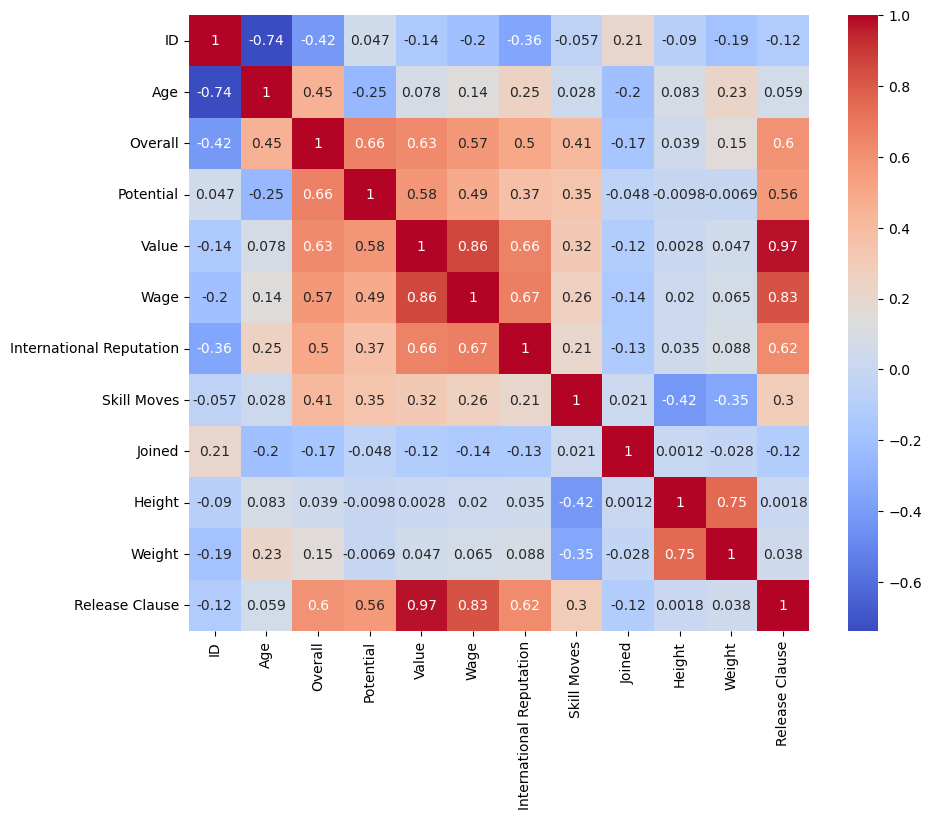

In [5]:
#obtener una matriz de correlacion y dejarla como heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [7]:
#Gráfico de Correlación que responda – “Cuál es la relación entre la edad y el overall?” – explicar la salida 
print(df[['Age', 'Overall']].head())




   Age  Overall
0   31       94
1   33       94
2   26       92
3   27       91
4   27       91


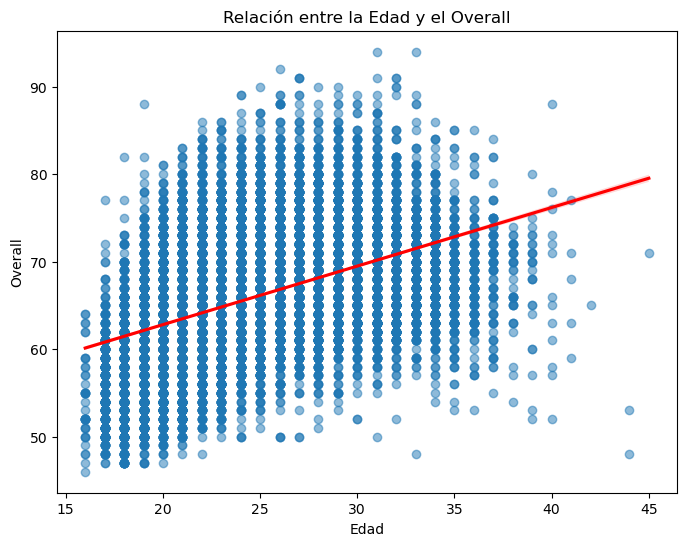

Correlación entre Edad y Overall:
             Age  Overall
Age      1.00000  0.45235
Overall  0.45235  1.00000


In [9]:
#  Crear un gráfico de correlación (scatter plot con línea de regresión)
plt.figure(figsize=(8,6))
sns.regplot(x=df['Age'], y=df['Overall'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

#  Configurar el gráfico
plt.title("Relación entre la Edad y el Overall")
plt.xlabel("Edad")
plt.ylabel("Overall")
plt.show()

#  Calcular la correlación numérica entre Edad y Overall
correlacion = df[['Age', 'Overall']].corr()
print("Correlación entre Edad y Overall:")
print(correlacion)

In [10]:
# Crear el scatter plot interactivo
fig = px.scatter(df, x="Age", y="Overall",
                 title="Relación entre Edad y Overall",
                 labels={"Age": "Edad", "Overall": "Overall"},
                 opacity=0.6, trendline="ols")  # Agregar línea de tendencia

# Mostrar la figura
fig.show()

Interpretación del gráfico con línea ascendente
 Tendencia positiva: A medida que los jugadores envejecen, su overall tiende a aumentar, aunque no de manera estrictamente lineal.
 Posibles razones:

Los jugadores más experimentados suelen tener un overall más alto debido a su desarrollo profesional.
Los jóvenes pueden tener overall variable, ya que algunos son estrellas en ascenso y otros están en formación.

In [13]:
#generar un grafico de barras por club que indique el numero de jugadores
# Contar el número de jugadores por club
club_counts = df["Club"].value_counts().reset_index()
club_counts.columns = ["Club", "Número de Jugadores"]

# Crear el gráfico de barras
fig = px.bar(club_counts, x="Club", y="Número de Jugadores",
             title="Número de jugadores por club",
             labels={"Club": "Club", "Número de Jugadores": "Cantidad de jugadores"},
             text_auto=True)

# Ajustar la orientación si hay muchos clubes
fig.update_layout(xaxis={'categoryorder': 'total descending'},
                  xaxis_tickangle=-45)  # Rotar etiquetas del eje X

# Mostrar el gráfico
fig.show()


In [14]:
#hacer un grafico multipanel que indique la relacion de altura (heigth) vs skill moves siendo la variable del panel si es zurdo o derecho
df["Foot"] = df["Preferred Foot"].replace({"Left": "Zurdo", "Right": "Diestro"})

# Crear el gráfico de dispersión con paneles (facetado)
fig = px.scatter(df, x="Height", y="Skill Moves",
                 color="Skill Moves",  # Colorear según Skill Moves
                 facet_col="Foot",  # Crear paneles por pie dominante
                 title="Relación entre Altura y Skill Moves (por Pie Dominante)",
                 labels={"Height": "Altura (cm)", "Skill Moves": "Movimientos de Habilidad", "Foot": "Pie Dominante"},
                 opacity=0.6)

# Ajustar el diseño
fig.update_layout(showlegend=False)  # Ocultar leyenda redundante

# Mostrar el gráfico
fig.show()


In [15]:
#Un gráfico que crea importante para mostrar a los potenciales cracks
#calcular la diferencia entre el overall y el potential
df["Diferencia"] = df["Potential"] - df["Overall"]

#crear el scatter plot
fig = px.scatter(df, x="Overall", y="Potential",
                 color="Diferencia",  # Resaltar jugadores con mayor diferencia
                 size="Diferencia",    # Tamaño de puntos según su potencial de crecimiento
                 hover_name="Name",    # Mostrar el nombre del jugador al pasar el mouse
                 title="Jugadores con Mayor Potencial de Crecimiento",
                 labels={"Overall": "Valoración Actual", "Potential": "Potencial"},
                 opacity=0.7)

# Mostrar el gráfico
fig.show()

In [16]:
#filtrar solo jugadores con alto pontencial
df_filtered = df[df["Potential"] > 85]
fig = px.scatter(df_filtered, x="Overall", y="Potential", color="Diferencia", size="Diferencia", hover_name="Name")
fig.show()


Mbappe, Dybala, Oblak, de gea, De Bruyne segun el analisis son las futuras estrellas

In [17]:
#agregar la edad al analisis para ver futuras estrellas
fig = px.scatter(df, x="Overall", y="Potential", color="Age", size="Diferencia", hover_name="Name")
fig.show()


Ayeva, Campbell, von Moos, Lenze son algunos de los cracks en potencia